## 

# <center>Steam games<center>

Перед Вами представлен датасет с данными по играм на площадке `Steam`. Ниже присутствует описание данных. Вашей задачей будет провести исследовательский анализ данных и выполнить определенные задачи:
* Провести предобработку данных (пропуски, дубликаты и т.д.) 
* Рассчитайте среднюю стоимость игр в `Steam`
* Постройте диаграмму, которая иллюстрирует какое количество игр поддерживает английский язык, а какое — нет
* Постройте диаграмму, которая иллюстрирует какое количество игр является бесплатными, а какое требуется покупать
* Постройте сводную таблицу с количеством выпущенных игр за каждый год (постройте для неё гистограмму)
* Найдите и постройте диаграмму для топ 10 разработчиков видеоигр и отдельно для топ 10 издателей видеоигр, начиная с 2017 года (включительно)
* Необходимо вывести топ 6 игр по количеству пользователей (`owners`)


**После выполнения каждого условия необходимо писать выводы. Также необходим общий вывод в конце о всей проделанной работе с краткими выводами из данных пунктов.**




## Описание данных

* `appid` — Уникальный идентификатор игры
* `name` — Название игры
* `release_date` — Год релиза игры
* `english` — Поддержка английского языка
* `developer` — Имя разработчика игры
* `publisher` — Имя издателя игры
* `platforms` — Названия поддерживаемых платформ
* `required_age` - Рекомендуемый возраст
* `genres` — Жанр игры
* `positive_ratings` — Количество позитивных отзывов
* `negative_ratings` — Количество отрицательных отзывов
* `average_playtime` — Среднее время игры
* `median_playtime` — Медианное время игры
* `owners` — Количество владельцев игры, то есть людей, купивших игру
* `price` — Стоимость игры


## Предобработка данных

In [3]:
from matplotlib.colors import ListedColormap
import pandas as pd
import matplotlib.colors as matcol
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
games_ds = pd.read_csv('C:/Users/molot/Downloads/Steam.csv')
length=0
for g in games_ds:
    if g==True:
        length += 1
print("количество дубликатов в датафрейме:", length)  # 2003
games_ds.drop_duplicates()

games_ds.isnull().sum()

количество дубликатов в датафрейме: 0


appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
genres               0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

In [16]:
games_ds.sample(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
17037,705070,FEMINAZI: 3000,2017-09-19,1,Paradox Terminal,Back To Basics Gaming,windows,0,Casual;Indie;Racing,12,26,33,1,1,0-20000,0.79
7772,432870,Special Tactics,2016-04-26,1,Beast Mode Games,Beast Mode Games,windows,0,Action;Indie;Strategy,10,39,11,0,0,0-20000,3.99
3050,294580,Freddi Fish and Luther's Water Worries,2014-05-01,1,Humongous Entertainment,Humongous Entertainment;Nightdive Studios,windows;mac;linux,0,Adventure;Casual,0,24,6,0,0,20000-50000,3.99
11574,545010,Ishin no Arashi / 維新の嵐,2017-03-21,0,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Strategy,0,2,4,0,0,0-20000,9.99
22458,863550,HITMAN™ 2,2018-11-13,1,IO Interactive A/S,Warner Bros Interactive Entertainment,windows,0,Action,125,10814,1756,636,514,5000000-10000000,44.99
17672,723020,3571 The Game,2018-01-01,1,FRAPPA STUDIO,FRAPPA STUDIO,windows;mac,0,Action;Adventure;Indie;RPG;Simulation;Early Ac...,0,0,5,0,0,0-20000,10.29
461,21640,Flock!,2009-04-07,1,Proper Games,Capcom,windows,0,Casual;Strategy,13,110,34,0,0,20000-50000,3.49
15899,673840,VR Formula,2017-08-17,1,SAT-BOX,SAT-BOX,windows,0,Action;Racing,0,14,4,0,0,0-20000,9.99
25025,954070,Beat Boxers,2018-10-23,1,BYU Animation - Class of 2018,Brigham Young University,windows,0,Action;Free to Play,0,38,23,0,0,20000-50000,0.00
19898,787730,Adventure Game,2018-07-12,1,IVGEMENT,IVGEMENT,windows,0,Adventure,0,1,1,0,0,0-20000,15.00


In [17]:
games_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   genres            27075 non-null  object 
 9   achievements      27075 non-null  int64  
 10  positive_ratings  27075 non-null  int64  
 11  negative_ratings  27075 non-null  int64  
 12  average_playtime  27075 non-null  int64  
 13  median_playtime   27075 non-null  int64  
 14  owners            27075 non-null  object 
 15  price             27075 non-null  float64
dtypes: float64(1), int64(8), object(7)
memor

In [19]:
games_ds.shape

(27075, 16)

In [18]:
column_names = list(games_ds.columns)
print("Названия колонок:", column_names)
print("Количество колонок:", len(column_names))

Названия колонок: ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'genres', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']
Количество колонок: 16


In [13]:
games_ds.developer.fillna('Unknown', inplace=True)
games_ds.publisher.fillna('Unknown publisher', inplace=True)
games_ds.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
genres              0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

#### Выводы:
В предоставленном датасете отсутствуют дубликаты. В столбце developer имеется 1 пропуск, в стоблце publisher 14 прокусков. Отсутствие данных можно обосновать неосведомленностью именем разработчика, издателя игры или намеренным желанием его скрыть. 
* В датасете имелся 1 пропуск в столбце developer и 14 пропусков в столбце publisher
* В двтвфрейме 16 столбцов
* 7 из них имеют тип данных object
* 8 столбца имеют тип int64
* 1 столбца имеют тип float64
* Всего в датафрейме 27075 строк
* Объем занимаемой памяти 3.3+ MB
Пропуски были заполнены значениями 'Unknown publisher' и 'Unknown'

## Исследовательский анализ данных (EDA)

количество игр поддерживающих английский язык:  26564
количество игр поддерживающих русский язык:  511


Text(0.5, 1.0, 'Соотношение игр поддерживающих английский и русский языках')

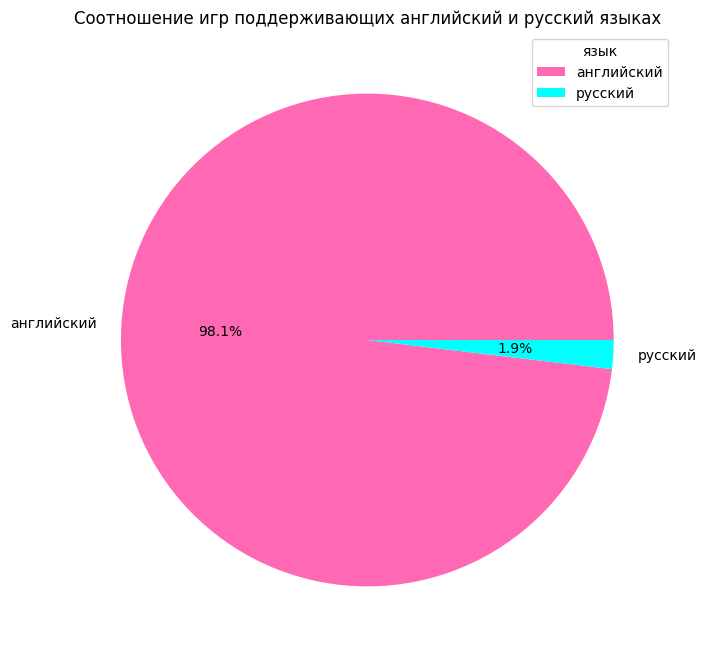

In [21]:
#количество игр, поддерживающих английский и русский язык 
print("количество игр поддерживающих английский язык: ",len(games_ds[games_ds['english'] ==1]))
print("количество игр поддерживающих русский язык: ", len(games_ds[games_ds['english'] == 0]))
sizes=[]
sizes.append(len(games_ds[games_ds['english'] == 1]))
sizes.append(len(games_ds[games_ds['english'] == 0]))
colors = ['#FF69B4', '#00FFFF']
labels=['английский','русский']
fig, ax=plt.subplots(figsize=(8,8))
wedges, texts, autotext=ax.pie(sizes, labels=labels,colors=colors,  autopct='%1.1f%%')

ax.legend(wedges, labels, title='язык')
ax.set_title('Соотношение игр поддерживающих английский и русский языках')

количество бесплатных игр:  2560
количество платных игр:  24515


Text(0.5, 1.0, 'Соотношение платных и бесплатных игр')

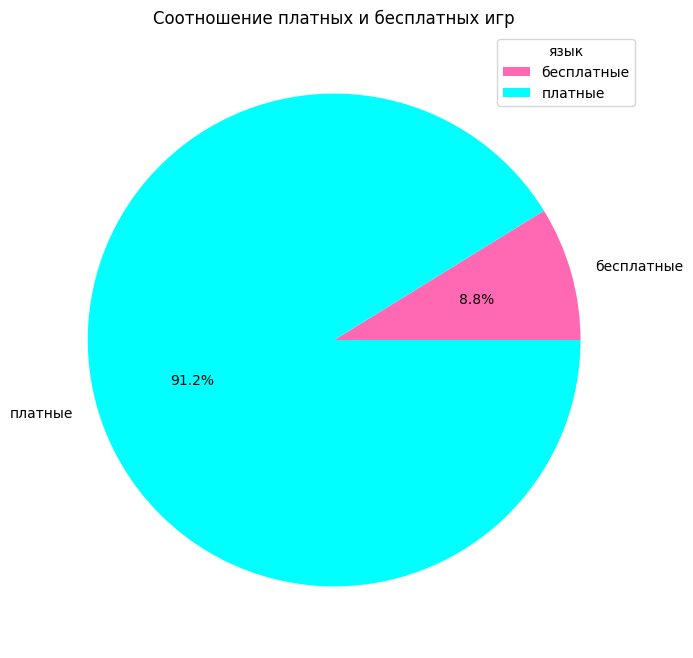

In [22]:
#количество бесплатных и платных игр
print("количество бесплатных игр: ", len(games_ds[games_ds['price'] == 0]))
print("количество платных игр: ", len(games_ds['price'])-len(games_ds[games_ds['price'] == 0]))

sizes = []
sizes.append(len(games_ds[games_ds['price'] == 0]))
sizes.append(len(games_ds[games_ds['english'] != 0]))
colors = ['#FF69B4', '#00FFFF']
labels = ['бесплатные', 'платные']
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotext = ax.pie(
    sizes, labels=labels, colors=colors,  autopct='%1.1f%%')

ax.legend(wedges, labels, title='язык')
ax.set_title('Соотношение платных и бесплатных игр')

In [6]:
#средняя стоимость игр у каждого разработчика
mean_price = games_ds.groupby(by='developer', as_index=False)[
    'price'].mean().head(10).reset_index()
pd.options.display.float_format = '{:.2f}'.format
mean_price

,index,developer,price
0,0,#workshop,2.89
1,1,'What Day is it?' Games,5.19
2,2,(STCG) Smoker The Car Game,0.79
3,3,+7 Software,5.49
4,4,"+Mpact Games, LLC.",5.19
5,5,-Yodasaurus- Games,3.99
6,6,.M.Y.W.,2.30
7,7,.ez Games,0.79
8,8,07th Expansion,10.49
9,9,08 Games,4.99


In [125]:
# топ самых "дорогих" разработчиков. Средняя стоимость игр каждого
max_price = games_ds.groupby(by='developer', as_index=False)[
    'price'].mean().sort_values('price', ascending=False).head(10)
print("топ самых 'дорогих' разработчиков. Средняя стоимость игр каждого")
max_price

топ самых 'дорогих' разработчиков. Средняя стоимость игр каждого


,developer,price
13625,Suomen Kuljetusturva Oy,421.99
12668,SideFX,209.99
15962,YoYo Games Ltd.,162.49
10858,Pixel Wonder,154.99
2420,Capt. McCay Soft,154.99
131,3Dflow SRL,154.99
2419,Capt McCay Soft,154.99
2671,Chroma Coda,98.99
3225,CyberLink,79.99
7717,Knife Edge Software,78.99


In [128]:
# самые популярные игры
cols = [0,1, 4, 5, 14]
df = games_ds[games_ds.columns[cols]]
games_price_top = df.sort_values('owners', ascending=False).head(6)
games_price_top


,appid,name,developer,publisher,owners
25,730,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,50000000-100000000
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,PUBG Corporation,PUBG Corporation,50000000-100000000
258,10180,Call of Duty®: Modern Warfare® 2,Infinity Ward;Aspyr (Mac),Activision;Aspyr (Mac),5000000-10000000
2602,278360,A Story About My Uncle,Gone North Games,Coffee Stain Publishing,5000000-10000000
903,49520,Borderlands 2,Gearbox Software;Aspyr (Mac);Aspyr (Linux),2K;Aspyr (Mac);Aspyr (Linux),5000000-10000000
1596,227300,Euro Truck Simulator 2,SCS Software,SCS Software,5000000-10000000


C:\Users\molot\AppData\Local\Temp\ipykernel_9672\2045754005.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  lineplot.set_xticklabels(df_games_year['year'], rotation=40)


Text(0.5, 1.0, 'График изменения количества выпущенных игр')

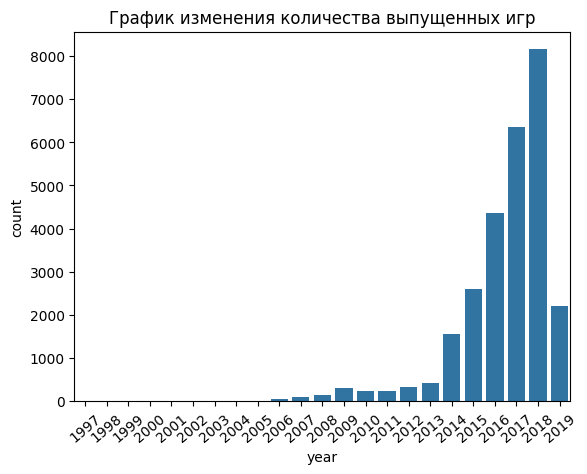

In [101]:
df_games_year = games_ds.groupby('year').size().reset_index(name='count')
count_labels = [f'{label}: {count}' for label, count in zip(
    df_games_year['year'].values, df_games_year['count'].values)]

df = pd.DataFrame(dict(

    x=df_games_year['year'],
    y=df_games_year['count']
))
lineplot=sns.barplot(x=df_games_year['year'], y=df_games_year['count'])
lineplot.set_xticklabels(df_games_year['year'], rotation=40)

plt.title("График изменения количества выпущенных игр")

In [132]:
# топ самых попуярных разработчиков
cols = [5, 14]
df = games_ds[games_ds.columns[cols]]
top_publisher = df.groupby(by='publisher').head(
    10).sort_values(by='owners', ascending=False)
display(top_publisher[games_ds['year'] > 2015].head(10))

C:\Users\molot\AppData\Local\Temp\ipykernel_9672\339033292.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(top_publisher[games_ds['year'] > 2015].head(10))


,publisher,owners
12836,PUBG Corporation,50000000-100000000
6046,Behaviour Digital Inc.,5000000-10000000
2016,Facepunch Studios,5000000-10000000
3864,Klei Entertainment,5000000-10000000
4712,Studio Wildcard,5000000-10000000
7737,Kristjan Skutta,5000000-10000000
22458,Warner Bros Interactive Entertainment,5000000-10000000
12965,"CAPCOM Co., Ltd.",5000000-10000000
11994,Fredaikis AB,5000000-10000000
11791,NS STUDIO,5000000-10000000


## Вывод

Был проведен анализ данных платформы Steam. В ходе анализа была проведена предобработка данных и исследовательский анализ данных.
Датасет имеет хорошее качество данных после обработки, несмотря на наличие начальных пропусков. Рынок игр в steam значитель вырос начиная с 1997 года и был на пике в 2018 (по количеству выпущенных игр). На платформе представлены как бесплатные игры, так и те, которые требуют покупки, при чем вторая категория преобладает (2560 и 24515 игр). 

Результаты аенализа начального датасета:


Основные результаты анализа:
* Игр, поддерживающих английский язык гораздо больше, чем поодерживающих русский, а именно 26564 и 511
* Самой популярной игрой является игра Counter-Strike: Global Offensive	
* Компанией с самыми дорогими играми ялвяется Suomen Kuljetusturva Oy
* Бесплатных игр меньше, чем платных
* Самым популярным разработчиком является компания PUBG Corporation (по количестку владельцев игр)
